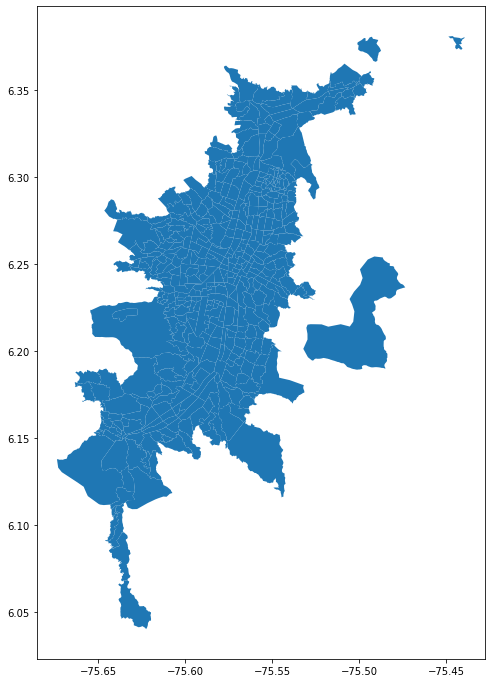

In [1]:
import geopandas as gp
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
%matplotlib inline

medellin = gp.read_file("maps/EOD_revised.shp")
_, ax = plt.subplots(1, figsize=(12, 12))
medellin.plot(ax=ax)
plt.show()

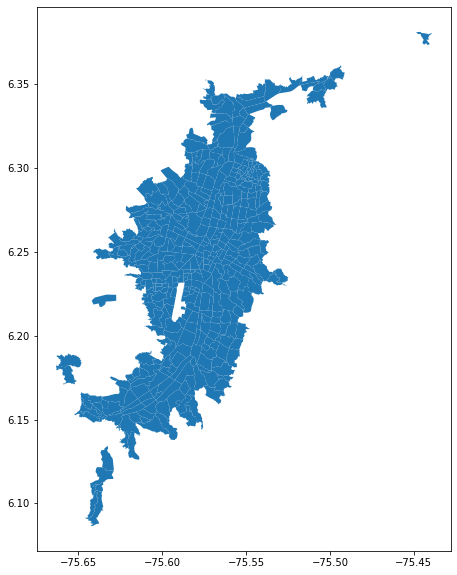

In [2]:
erased = []
for index, row in medellin.iterrows():
    if row['geometry'].area >= 1e-4:
        erased.append(index)

new_medellin = medellin.drop(erased, axis=0)
new_medellin.plot(figsize=(10, 10))
plt.show()

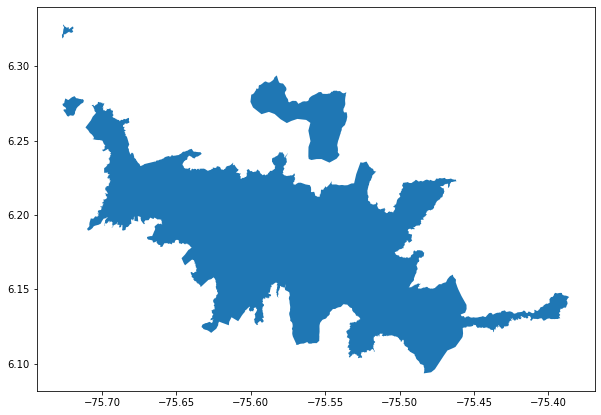

In [3]:
polygons = []
for index, row in medellin.iterrows():
    polygons.append(row['geometry'])
    
medellin_merged = gp.GeoSeries(cascaded_union(polygons))
medellin_merged.rotate(90).plot(figsize=(10, 10))
plt.show()